In [1]:
import csv
import pandas as pd

# Specify the path to your CSV file using forward slashes
csv_file_path = 'C:/Users/ACER/Desktop/ders notları/2-2/CS210/project/df_real.csv'

# Reading data from CSV file into a DataFrame
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

    # Convert the CSV data to a list of lists
    data = list(csv_reader)

# Convert the list of lists to a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Display the DataFrame
display(df.head())
df.info()

,Watched Date,Film Name,Film Year,My Rating,General Rating,Director,Genres,Month
0,2023-12-25,In Bruges,2008,,4.1,Martin McDonagh,"['Drama', 'Comedy', 'Crime']",2023-12
1,2023-12-25,The Nightmare Before Christmas,1993,3.5,3.9,Henry Selick,"['Family', 'Animation', 'Fantasy']",2023-12
2,2023-12-16,The Matrix,1999,5.0,4.2,Lilly Wachowski,"['Science Fiction', 'Action']",2023-12
3,2023-12-11,The Hunger Games,2012,,3.6,Gary Ross,"['Fantasy', 'Science Fiction', 'Adventure']",2023-12
4,2023-12-10,The Hunger Games: The Ballad of Songbirds & Sn...,2023,3.5,3.6,Francis Lawrence,"['Science Fiction', 'Drama', 'Action']",2023-12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Watched Date    108 non-null    object
 1   Film Name       108 non-null    object
 2   Film Year       108 non-null    object
 3   My Rating       108 non-null    object
 4   General Rating  108 non-null    object
 5   Director        108 non-null    object
 6   Genres          108 non-null    object
 7   Month           108 non-null    object
dtypes: object(8)
memory usage: 6.9+ KB


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px 
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import Rectangle

[6, 7, 9, 23, 21, 11, 15, 16]


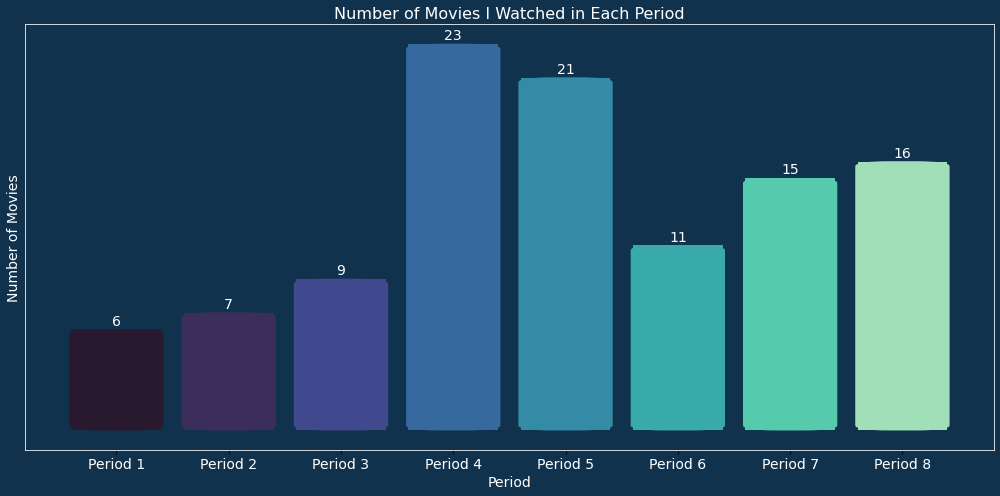

In [15]:
# List of periods
periods = [
    ('2022-01-01', '2022-03-31'),
    ('2022-04-01', '2022-06-30'),
    ('2022-07-01', '2022-09-30'),
    ('2022-10-01', '2022-12-31'),
    ('2023-01-01', '2023-03-31'),
    ('2023-04-01', '2023-06-30'),
    ('2023-07-01', '2023-09-30'),
    ('2023-10-01', '2023-12-31'),
]

# Her bir periyodun aralığında kaç film izlendiğini bulma
movie_numbers = []

for period in periods:
    start_date, end_date = period
    subset_df = df[(df['Watched Date'] >= start_date) & (df['Watched Date'] <= end_date)]
    movie_num = len(subset_df)
    movie_numbers.append(movie_num)

print(movie_numbers)

# Set the size of the figure (width, height)
fig = plt.figure(figsize=(14, 7))

# Set the background color for the entire plot
fig.patch.set_facecolor('#11324D') 
ax = plt.axes()
ax.set_facecolor("#11324D")
# Set the borders of the chart to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Use Seaborn's 'mako' color palette for a dark-to-light transition
colors = sns.color_palette("mako", n_colors=len(movie_numbers))

# Increase the linewidth to make the rounded ends greater
bars = plt.bar(range(1, len(movie_numbers) + 1), movie_numbers, edgecolor='white', linewidth=0, color=colors, capstyle='round')

# Add FancyBboxPatch to each bar for rounded corners with increased roundness
for index, (bar, count) in enumerate(zip(bars, movie_numbers)):
    bbox = FancyBboxPatch((index + 0.6, 0), 0.8, count, boxstyle="round,pad=0.02, rounding_size=0.3", linewidth=0, edgecolor='white', facecolor=bar.get_facecolor())
    plt.gca().add_patch(bbox)

plt.xticks(range(1, len(movie_numbers) + 1), [f'Period {i+1}' for i in range(len(periods))], fontsize=14, color='white')  # Rotate x-axis labels for better visibility

# Remove the grid
plt.grid(False)

# Remove Y labels
plt.yticks([])

# Show values above bars
for index, value in enumerate(movie_numbers):
    plt.text(index + 1, value + 0.1, str(value), ha='center', va='bottom', color='white', fontsize=14)  # Set text color to white

# Add x, y labels, and title
plt.xlabel('Period', fontsize=14, color='white')
plt.ylabel('Number of Movies', fontsize=14, color='white')
plt.title('Number of Movies I Watched in Each Period', fontsize=16, color='white')

plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


Predicted number of films for the upcoming period (Period 9): 19.035714285714285


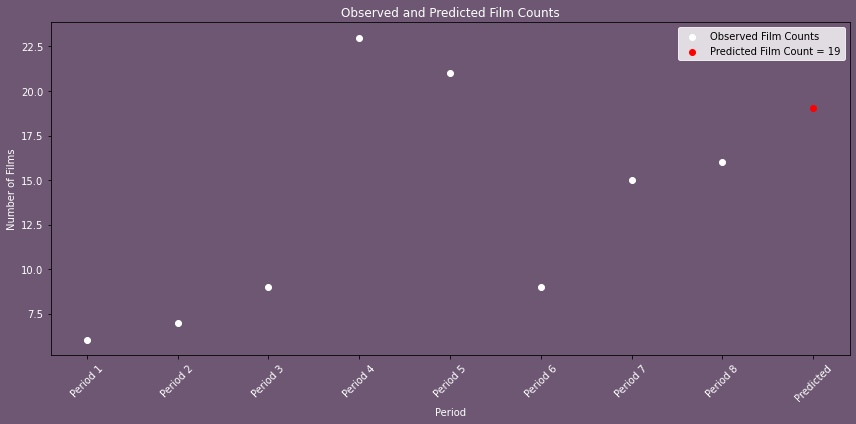

In [16]:
# List of periods
periods = [
    ('2022-01-01', '2022-03-31'),
    ('2022-04-01', '2022-06-30'),
    ('2022-07-01', '2022-09-30'),
    ('2022-10-01', '2022-12-31'),
    ('2023-01-01', '2023-03-31'),
    ('2023-04-01', '2023-06-30'),
    ('2023-07-01', '2023-09-30'),
    ('2023-10-01', '2023-12-31'),
]

# Number of films watched in each period
film_counts = [6, 7, 9, 23, 21, 9, 15, 16]

# Create a linear regression model
regression_model = np.poly1d(np.polyfit(range(1, len(periods) + 1), film_counts, 1))

# Predict the number of films for the upcoming period (9th period)
upcoming_period = len(periods) + 1
predicted_films = regression_model(upcoming_period)

# Print the predicted number of films for the upcoming period
print(f"Predicted number of films for the upcoming period (Period {upcoming_period}): {predicted_films}")


# Visualize the prediction
plt.figure(figsize=(12, 6), facecolor='#6E5773')
plt.scatter(range(1, len(periods) + 1), film_counts, color='w', label='Observed Film Counts')
plt.scatter(upcoming_period, predicted_films, color='r', label='Predicted Film Count = 19')
plt.title('Observed and Predicted Film Counts', color='white')  # Başlık rengi
plt.xlabel('Period', color='white')  # X ekseni etiketi rengi
plt.ylabel('Number of Films', color='white')  # Y ekseni etiketi rengi
plt.xticks(range(1, len(periods) + 2), [f'Period {i}' for i in range(1, len(periods) + 1)] + ['Predicted'], rotation=45, color='white')  # X ekseni tickleri rengi
plt.yticks(color='white')  # Y ekseni tickleri rengi
plt.legend(facecolor='white', edgecolor='white')  # Legende arka plan ve çerçeve rengi
plt.grid(False)
plt.gca().set_facecolor('#6E5773')
plt.tight_layout()
plt.show()
